In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Physics 5BL: RC and RLC Circuits

### Week 9

### Objective

In this experiment, we will study the transient behavior of a simple RC circuit. We will measure the time constant of the circuit and compare it to the theoretical value. We will also measure the time constant of a circuit with a resistor and a capacitor in series and compare it to the theoretical value.

## Part 1A: RC Circuits


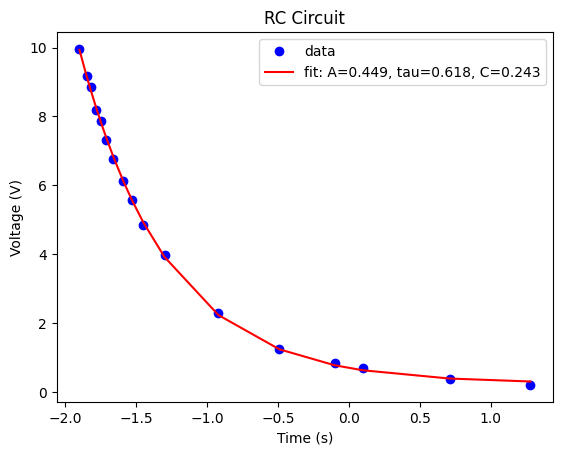

D: 1.6169358338364728


array([0.44886111, 0.61845373, 0.24314275])

In [128]:
# fit the time and voltage to an exponential decay and plot it  
def part1a():
    time = [
        -1.9,
        -1.85,
        -1.82,
        -1.78,
        -1.75,
        -1.71,
        -1.66,
        -1.59,
        -1.53,
        -1.45,
        -1.3,
        -0.92,
        -0.49,
        -0.10,
        0.10,
        0.71,
        1.28,
    ]
    voltage = [9.96,
               9.16,
               8.84,
               8.20,
               7.88,
               7.32,
               6.76,
               6.12,
               5.56,
               4.84,
               3.96,
               2.28,
               1.24,
               0.84,
               0.68,
               0.36,
               0.2,
               ]
    def exp_decay(t, A, tau, C):
        return A * np.exp(- t / tau) + C

    popt, idk = curve_fit(exp_decay, time, voltage, p0=[5, 1, 0])
    plt.plot(time, voltage, 'bo', label='data')
    plt.plot(time, exp_decay(np.array(time), *popt), 'r-', label='fit: A=%5.3f, tau=%5.3f, C=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('RC Circuit')
    plt.legend()
    plt.show()

    print("D:", 1/popt[1])
    return popt
part1a()

## Part 1B: RC Circuits with homemade capacitor

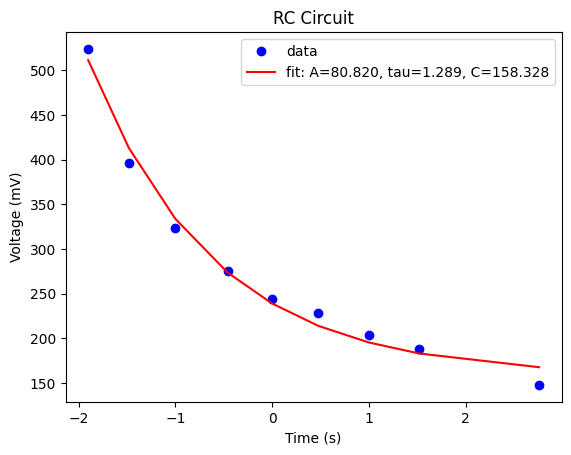

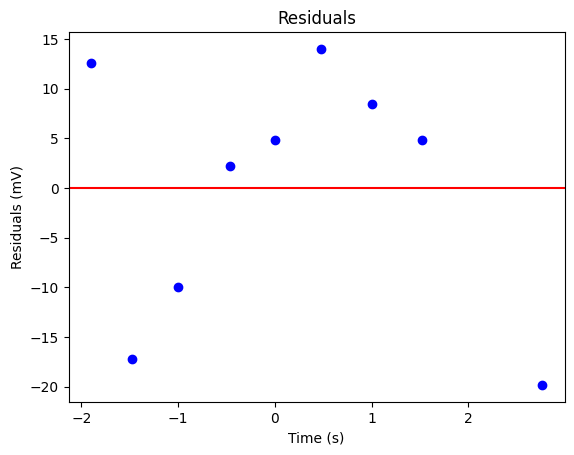

Data used: Capinski
C: 7.760011235835671e-07
D: 1.2886579279447532
C_exp: 8.7438e-09
e: 337.24516453001604


array([ 80.82024906,   1.28865793, 158.32752307])

In [129]:
# fit the time and voltage to an exponential decay and plot it
# then determine the capacitance, given the resistance is 1M ohm
def part1b():
    timeP = [-1.8, -1.46,-0.98,-0.52,0,0.52,1.02,2.02,3,]
    voltageP = [436,316,220,188,148,116,108,76,68,]
    timeC = [-1.90,-1.48,-1.0,-0.46,0,0.48,1.0,1.52,2.76,]
    voltageC = [524,396,324,276,244,228,204,188,148,]
    data_used = ""
    def usePData():
        nonlocal data_used
        data_used = "Patel"
        return timeP, voltageP
    def useCData():
        nonlocal data_used
        data_used = "Capinski"
        return timeC, voltageC
    time, voltage = useCData() # change this to use the other data
    def exp_decay(t, A, tau, C):
        return A * np.exp(- t / tau) + C

    popt, idk = curve_fit(exp_decay, time, voltage, p0=[5, 1, 0])
    plt.plot(time, voltage, 'bo', label='data')
    plt.plot(time, exp_decay(np.array(time), *popt), 'r-', label='fit: A=%5.3f, tau=%5.3f, C=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title('RC Circuit')
    plt.legend()
    plt.show()
    #plot the residuals
    plt.plot(time, voltage - exp_decay(np.array(time), *popt), 'bo')
    #line at 0
    plt.axhline(0, color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Residuals (mV)')
    plt.title('Residuals')
    plt.show()
    
    # find the capacitance
    tau = 1/popt[1]
    R = 1e6
    C = tau / R
    print("Data used:", data_used)
    print("C:", C)
    print("D:", 1/tau)
    
    
    # FUNKY BUSINESS GOIN ON HERE
    
    # estimate an effective dielectric constant
    A = 200e-3 * 130e-3 # slightly different per data set
    d = 0.0001
    e0 = 8.85e-12
    # C = e * e0 * A / d
    e_exp = 3.8
    C_exp = e_exp * e0 * A / d
    print("C_exp:", C_exp)
    e = C * d / (e0 * A)
    print("e:", e)
    
    return popt
part1b()

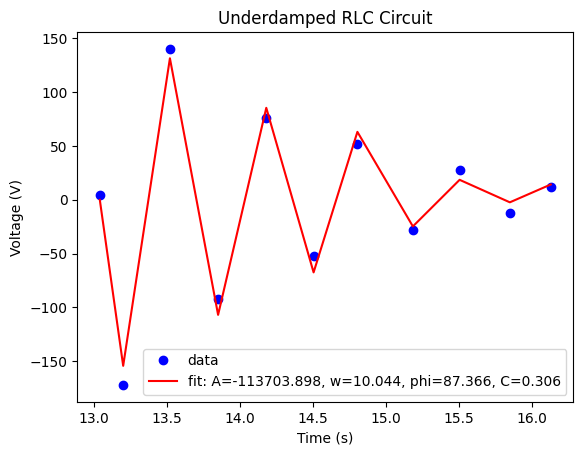

w: 10.04431867519562
D: 0.09955876872659301


array([-1.13703898e+05,  1.00443187e+01,  8.73659264e+01,  3.05918365e-01])

In [130]:
def part2a():
    time = [13.04,
            13.2,
            13.52,
            13.85,
            14.18,
            14.504,
            14.804,
            15.184,
            15.504,
            15.848,
            16.128,
            ]
    voltage = [3.97,
               -172.0,
               140.0,
               -92.0,
               76.0,
               -52.0,
               52.0,
               -28.0,
               28.0,
               -12.0,
               12.0,
               ]
    # voltage = [x - voltage[0] for x in voltage] # normalize the data
    # perform a sinusoidal fit using the voltage values as the peaks of the damping oscillation and the time values as the time of the peaks
    
    def damping_sin(t, A, w, phi, C):
        return A * np.exp(-t / 2) * np.cos(w * t + phi) + C
    
    # p0 is the initial guess for the fitting coefficients (A, w, phi, C)
    popt, idk = curve_fit(damping_sin, time, voltage, p0=[150, 10, 0, 0])
    plt.plot(time, voltage, 'bo', label='data')
    plt.plot(time, damping_sin(np.array(time), *popt), 'r-', label='fit: A=%5.3f, w=%5.3f, phi=%5.3f, C=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Underdamped RLC Circuit')
    plt.legend()
    plt.show()
    print("w:", popt[1])
    print("D:", 1/popt[1])
    return popt
part2a()

## Part 2A: Underdamped RLC Circuit


## Part 2B: Overdamped RLC Circuit

###

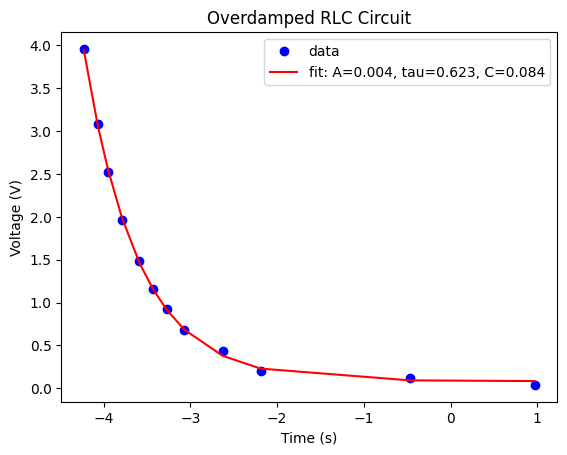

D: 1.6042622607970092


array([0.00436104, 0.62333948, 0.08394508])

In [131]:
# fit the time and voltage to an exponential decay and plot it
def part2b():
    time = [-4.23,
            -4.07,
            -3.95,
            -3.79,
            -3.59,
            -3.43,
            -3.27,
            -3.07,
            -2.63,
            -2.19,
            -0.47,
            .97,
            ]
    voltage = [3.96,
           3.08,
           2.52,
           1.96,
           1.48,
           1.16,
           0.92,
           0.68,
           0.44,
           0.2,
           0.12,
           .04,
           ]
    def exp_decay(t, A, tau, C):
        return A * np.exp(- t / tau) + C

    popt, idk = curve_fit(exp_decay, time, voltage, p0=[4, 1, 0])
    plt.plot(time, voltage, 'bo', label='data')
    plt.plot(time, exp_decay(np.array(time), *popt), 'r-', label='fit: A=%5.3f, tau=%5.3f, C=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Overdamped RLC Circuit')
    plt.legend()
    plt.show()

    print("D:", 1/popt[1])
    return popt
part2b()